In [1]:
from __future__ import print_function, division
from future.utils import iteritems

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

from datetime import datetime
from scipy.stats import norm
from scipy.stats import multivariate_normal as mvn

In [2]:
class NaiveBayes(object):
    
    def fit(self, X, Y, smoothing=1e-2):
        
        self.gaussians = dict()
        self.priors = dict()
        labels = set(Y)
        
        for c in labels:
            current_x = X[Y == c]
            self.gaussians[c] = {
                'mean': current_x.mean(axis=0),
                'var': current_x.var(axis=0) + smoothing,
            }
            self.priors[c] = float(len(Y[Y == c])) / len(Y)

    def score(self, X, Y):
        P = self.predict(X)
        return np.mean(P == Y)

    def predict(self, X):
        N, D = X.shape
        K = len(self.gaussians)
        P = np.zeros((N, K))
        for c, g in iteritems(self.gaussians):
            mean, var = g['mean'], g['var']
            P[:,c] = mvn.logpdf(X, mean=mean, cov=var) + np.log(self.priors[c])
        return np.argmax(P, axis=1)


def get_data(limit=None):
    print("Reading in and transforming data...")
    df = pd.read_csv('mnist_train.csv')
    data = df.values
    np.random.shuffle(data)
    X = data[:, 1:] / 255.0 # data is from 0..255
    Y = data[:, 0]
    if limit is not None:
        X, Y = X[:limit], Y[:limit]
    return X, Y

if __name__ == '__main__':
    X, Y = get_data(20000)
    Ntrain = len(Y) // 2
    Xtrain, Ytrain = X[:Ntrain], Y[:Ntrain]
    Xtest, Ytest = X[Ntrain:], Y[Ntrain:]

    model = NaiveBayes()
    t0 = datetime.now()
    model.fit(Xtrain, Ytrain)
    print("Training time:", (datetime.now() - t0))

    t0 = datetime.now()
    print("Train accuracy:", model.score(Xtrain, Ytrain))
    print("Time to compute train accuracy:", (datetime.now() - t0), "Train size:", len(Ytrain))

    t0 = datetime.now()
    print("Test accuracy:", model.score(Xtest, Ytest))
    print("Time to compute test accuracy:", (datetime.now() - t0), "Test size:", len(Ytest))

Reading in and transforming data...
Training time: 0:00:00.147838
Train accuracy: 0.8088
Time to compute train accuracy: 0:00:03.295905 Train size: 10000
Test accuracy: 0.7938
Time to compute test accuracy: 0:00:03.408976 Test size: 10000


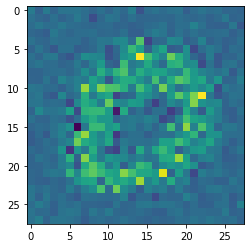

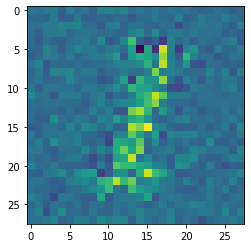

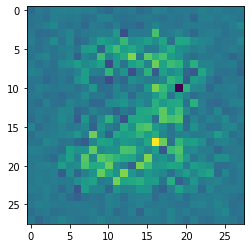

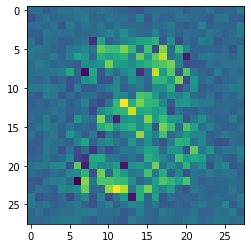

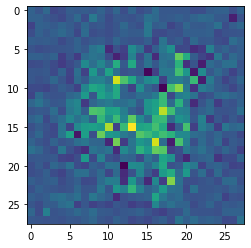

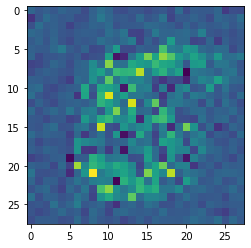

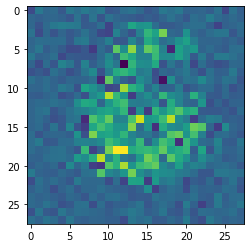

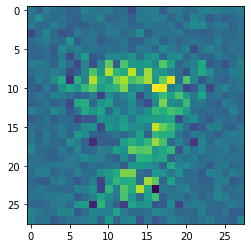

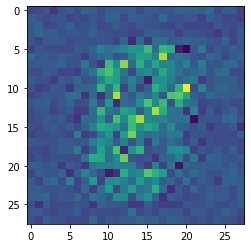

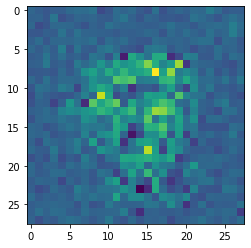

In [3]:
for label in range(0,10):

    D = len(model.gaussians[label]['mean'])
    var = np.zeros((D, D))
    var += np.eye(D) * model.gaussians[label]['var']

    sample = np.random.multivariate_normal(model.gaussians[label]['mean'], var)

    pixels = sample.reshape((28, 28))
    plt.imshow(pixels)
    plt.show()

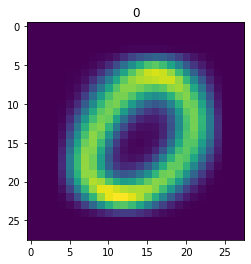

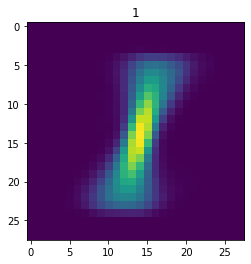

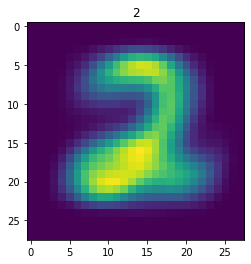

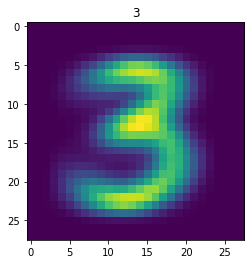

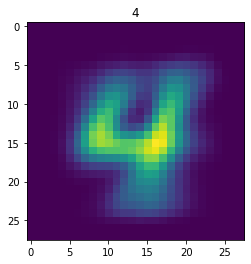

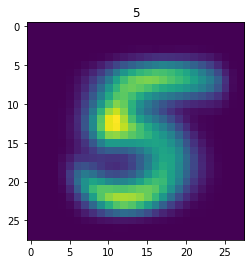

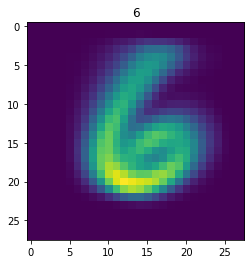

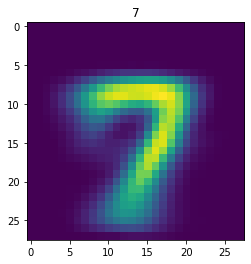

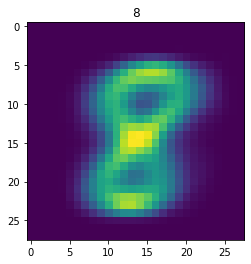

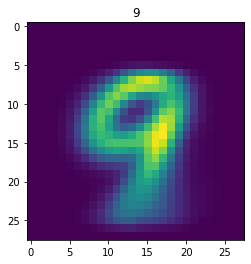

In [4]:
for c, g in iteritems(model.gaussians):
        plt.imshow(g['mean'].reshape(28, 28))
        plt.title(c)
        plt.show()